# Task 6 -- An application: Bertrand's paradox (probability) 

Consider the [Bertrand paradox](https://en.wikipedia.org/wiki/Bertrand_paradox_(probability)).

For each of the three cases generate a sample of 100 elements (chords) and compute the ratio of the chords bigger than the side of the equilateral triangle inscribed in the circle. 
   
The circle radius is equal with 1 and the set of chords will contain the cartesian coordinates of the edges of the chords. The origin of the coordinate system is in the origin of the circle.   

Draw using matplotlib each set of chords for each case respectively.


# Solution:

References:

http://web.mit.edu/tee/www/bertrand/problem.html

http://www.bertrands-paradox.com/

https://stackoverflow.com/questions/5837572/generate-a-random-point-within-a-circle-uniformly/50746409#50746409

https://www.nagwa.com/en/explainers/567105213104/

https://en.wikipedia.org/wiki/Right_triangle

Method 1 probability: 0.34


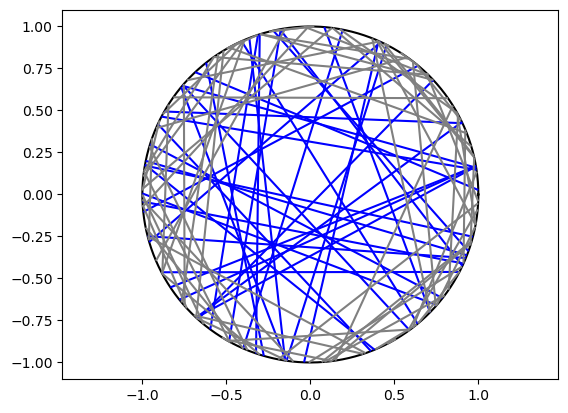

Method 2 probability: 0.57


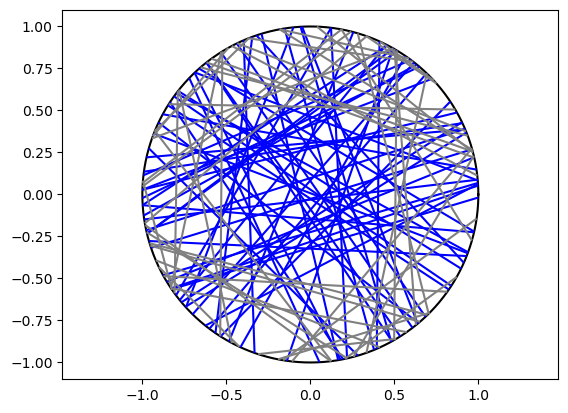

Method 3 probability: 0.26


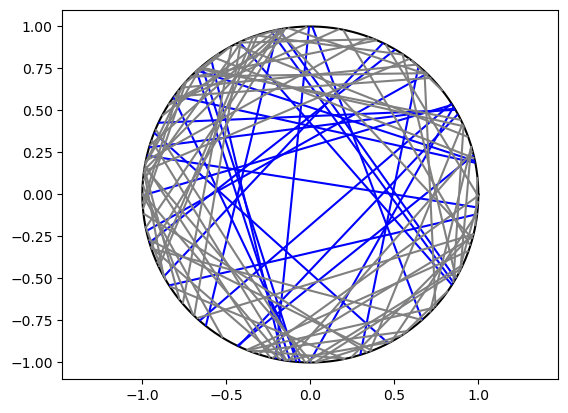

In [12]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import collections  as mc
from math import sqrt

def polar(r, theta):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return (x, y)

def method1():
    # simulate two uniform random variables theta1 and theta2 on the interval (0,2*pi) to describe the angles of the two points
    # then the end points of the chord (in Cartesian coordinates) are: 
    # point1: x1 = r*cos(theta1), y1 = r*sin(theta1)
    # point2: x2 = r*cos(theta2), y2 = r*sin(theta2)
    
    # generate angles
    theta1 = circumference * np.random.uniform(0, 1, n) 
    theta2 = circumference * np.random.uniform(0, 1, n)
    
    # calculate chord endpoints
    x1 = x0 + r * np.cos(theta1)
    y1 = y0 + r * np.sin(theta1)
    x2 = x0 + r * np.cos(theta2)
    y2 = y0 + r * np.sin(theta2)
    
    # length of chord
    length = np.hypot(x1 - x2, y1 - y2)
    
    # draw circle
    fig, ax = plt.subplots(1, 1)
    ax.plot(x0 + xp, y0 + yp, color='k')
    ax.axis('equal')
    
    # generate chords
    good_chords = []
    chords = []
    for i in range(n):
        if length[i] > triangle_side:
            good_chords.append([(x1[i], y1[i]), (x2[i], y2[i])])
        else:
            chords.append([(x1[i], y1[i]), (x2[i], y2[i])])
    
    # plot chordes
    gc = mc.LineCollection(good_chords, colors='blue')
    c = mc.LineCollection(chords, colors='gray')
    ax.add_collection(gc)
    ax.add_collection(c)

   
    # calculate probability 
    probability = np.mean(length > triangle_side)
    
    print('Method {} probability: {}'.format(1, probability))
    plt.show()
    

    
def method2():
    # random variable theta for the angle on the interval (0,2*pi)
    # random variable p for the random radius on the interval (0,r)
    # the random radius and its perpendicular chord create a right-angle triangle
    # the distance from the point (theta, p) to the circle along the chord is: q = sqrt(r^2 - p^2)
    # then the endpoints of the chord are: 
    # point1: x1 = p*cos(theta) + q*sin(theta), y1 = p*sin(theta)-q*cos(theta), 
    # point2: x2 = p*cos(theta) - q*sin(theta), y2 = p*sin(theta)+q*cos(theta), 

    # generate angle
    theta = circumference * np.random.uniform(0, 1, n) 
    
    # generate radius
    p = r * np.random.uniform(0, 1, n)
    
    # distance to circle edge (along line)
    q = np.sqrt(r ** 2 - p ** 2)

    # calculate trig values
    sin_theta = np.sin(theta)
    cos_theta = np.cos(theta)

    # calculate chord endpoints
    x1 = x0 + p * cos_theta + q * sin_theta
    y1 = y0 + p * sin_theta - q * cos_theta
    x2 = x0 + p * cos_theta - q * sin_theta
    y2 = y0 + p * sin_theta + q * cos_theta
    
    # length of chord
    length = np.hypot(x1 - x2, y1 - y2)

    # draw circle
    fig, ax = plt.subplots(1, 1);
    ax.plot(x0 + xp, y0 + yp, color='k');
    ax.axis('equal');
    
    # generate chords
    good_chords = []
    chords = []
    for i in range(n):
        if length[i] > triangle_side:
            good_chords.append([(x1[i], y1[i]), (x2[i], y2[i])])
        else:
            chords.append([(x1[i], y1[i]), (x2[i], y2[i])])
    
    # plot chordes
    gc = mc.LineCollection(good_chords, colors='blue')
    c = mc.LineCollection(chords, colors='gray')
    ax.add_collection(gc)
    ax.add_collection(c)
    
    # calculate probability 
    probability = np.mean(length > triangle_side)
    
    print('Method {} probability: {}'.format(2, probability))
    plt.show()
    

    
def method3():
    # random variable theta for the angle on the interval (0,2*pi)
    # random variable p between 0 and r by 
        # generate a uniform variable on the interval (0,1)
        # take the square root of the generated variable
        # multiply the result by the radius
    # use the trigonometry from Method 2 to find the endpoints of the chord
    # the distance from the point (theta, p) to the circle along the chord is: q = sqrt(r^2 - p^2)
    # then the endpoints of the chord are: 
    # point1: x1 = p*cos(theta) + q*sin(theta), y1 = p*sin(theta)-q*cos(theta), 
    # point2: x2 = p*cos(theta) - q*sin(theta), y2 = p*sin(theta)+q*cos(theta), 
    
    
    # choose a point uniformly in the disk
    theta = circumference * np.random.uniform(0, 1, n); 
    p = r * np.sqrt(np.random.uniform(0, 1, n)); 
    
    # distance to circle edge (alonge line)
    q = np.sqrt(r ** 2 - p ** 2); 

    # calculate trig values
    sin_theta = np.sin(theta);
    cos_theta = np.cos(theta);

    # calculate chord endpoints
    x1 = x0 + p * cos_theta + q * sin_theta;
    y1 = y0 + p * sin_theta - q * cos_theta;
    x2 = x0 + p * cos_theta - q * sin_theta;
    y2 = y0 + p * sin_theta + q * cos_theta;

    # length of chord
    length = np.hypot(x1 - x2, y1 - y2);

    # draw circle
    fig, ax = plt.subplots(1, 1);
    ax.plot(x0 + xp, y0 + yp, color='k');
    ax.axis('equal');
    
    # generate chords
    good_chords = []
    chords = []
    for i in range(n):
        if length[i] > triangle_side:
            good_chords.append([(x1[i], y1[i]), (x2[i], y2[i])])
        else:
            chords.append([(x1[i], y1[i]), (x2[i], y2[i])])
    
    # plot chordes
    gc = mc.LineCollection(good_chords, colors='blue')
    c = mc.LineCollection(chords, colors='gray')
    ax.add_collection(gc)
    ax.add_collection(c)
    
    
    # calculate probability 
    probability = np.mean(length > triangle_side)
    print('Method {} probability: {}'.format(3, probability))
    plt.show()
   


plt.close('all')

# circle center
x0 = 0
y0 = 0

#circle radius
r = 1

# number of trails
n = 10 ** 2

# circle circumference angles
circumference = 2 * np.pi

# points of the equilateral triangle inscribed in the circle
top   = polar(r, np.pi/2)
right = polar(r, np.pi/2-(2*np.pi)/3)
left  = polar(r, np.pi/2+(2*np.pi)/3)
    
# side length of the equilateral triangle inscribed in the circle
triangle_side = sqrt((top[0] - right[0])**2 + (top[1]-right[1])**2)

# points of circle
t = np.linspace(0, circumference, 1000)
xp = r * np.cos(t)
yp = r * np.sin(t)

    
method1()
method2()
method3()
